In [213]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
import utils as ut
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.lda import LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.grid_search import GridSearchCV
import numpy as np
reload(ut)

X, y = ut.load_X(), ut.load_y()
X = X[:, :]

X = scale(X)

rfc = RandomForestClassifier()
# rfc = SVC(probability=True)
gbc = GradientBoostingClassifier()

rfc_p = {
    'n_estimators': [5, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy'],
}
# rfc_p = {
#     'C': np.logspace(-2, 0.3, 10)
# }
gbc_p = {
    'loss': ['deviance'],
    'learning_rate': np.logspace(-2, 0, 10),
    'n_estimators': [10, 50, 100, 250]
}
kfold = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=0)

search_r = GridSearchCV(rfc, rfc_p, n_jobs=-1, cv=kfold, scoring='roc_auc')
search_g = GridSearchCV(gbc, gbc_p, n_jobs=-1, cv=kfold, scoring='roc_auc')

search_r.fit(X, y)
search_g.fit(X, y)

print search_r.best_score_
print search_g.best_score_

0.910028745466
0.913994717458


/Users/giulio/anaconda/lib/python2.7/site-packages/sklearn/ensemble/gradient_boosting.py:375: RuntimeWarning: overflow encountered in exp
  return y - 1.0 / (1.0 + np.exp(-pred.ravel()))
/Users/giulio/anaconda/lib/python2.7/site-packages/sklearn/ensemble/gradient_boosting.py:375: RuntimeWarning: overflow encountered in exp
  return y - 1.0 / (1.0 + np.exp(-pred.ravel()))
/Users/giulio/anaconda/lib/python2.7/site-packages/sklearn/ensemble/gradient_boosting.py:375: RuntimeWarning: overflow encountered in exp
  return y - 1.0 / (1.0 + np.exp(-pred.ravel()))
/Users/giulio/anaconda/lib/python2.7/site-packages/sklearn/ensemble/gradient_boosting.py:375: RuntimeWarning: overflow encountered in exp
  return y - 1.0 / (1.0 + np.exp(-pred.ravel()))


In [218]:
# rfc = RandomForestClassifier(**search_r.best_params_)
clf1 = RandomForestClassifier(**search_r.best_params_)
# clf1 = SVC(probability=True, **search_r.best_params_)
clf2 = GradientBoostingClassifier(**search_g.best_params_)
print rfc
print gbc

tots = np.zeros(shape=(5, 3))

for j in range(5):
    kfold = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=0)

    gbcs = np.zeros(len(kfold))
    rfcs = np.zeros(len(kfold))
    scores = np.zeros(len(kfold))

    for i, (train, test) in enumerate(kfold):
        clf1.fit(X[train], y[train])
        rfc_y = clf1.predict_proba(X[test])[:, 1]
        clf2.fit(X[train], y[train])
        gbc_y = clf2.predict_proba(X[test])[:, 1]
        # print roc_auc_score(y[test], rfc_y)
        # print roc_auc_score(y[test], gbc_y)

        alpha = 0.5

        tot = alpha*rfc_y+(1-alpha)*gbc_y
        
        # tot[np.loadtxt("data/emptyfiles.txt", dtype='int')] = 0.0
        # print tot
        # print "power combined:\n%s\n" % roc_auc_score(y[test], tot)
        gbcs[i] = roc_auc_score(y[test], gbc_y)
        rfcs[i] = roc_auc_score(y[test], rfc_y)
        scores[i] = roc_auc_score(y[test], tot)
    
    tots[j] = np.array([gbcs.mean(), rfcs.mean(), scores.mean()])
    print j+1

print tots.mean(axis=0)


RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
1
2
3
4
5
[ 0.91423111  0.90297831  0.90677961]


In [142]:
import random
import os
os.urandom(8).encode('hex')

'85b0b24d1dbd17c9'

In [146]:
a = np.loadtxt("data/subm/5c44ac32d5941194.csv", dtype='str', delimiter=",", skiprows=1, usecols=(1, )).astype(float)
print a

[ 0.00483424  0.00483424  0.0079747  ...,  0.10596175  0.00483424
  0.01779815]


(4700,)


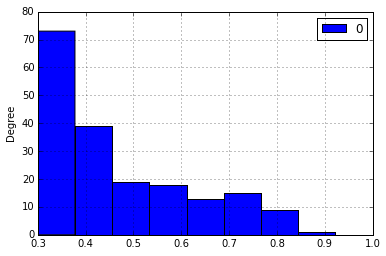

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print a.shape
df = pd.DataFrame(a)
df.plot(kind='hist', bins=np.linspace(0.3, 1, 10))
